In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)

path = "C:/Users/Admin/Documents/ironhack/streaming_service_recommender/"

## EDA Netflix

#### Goals

- Get descriptive for rating for each streaming service.

- Compare findings.

-----

### 1. Netflix
#### ii. Import data

In [2]:
netflix = pd.read_pickle(path + "Data/netflix_final.pkl")

In [3]:
netflix.head()

,show,year,rating,imdb,rotten_tomatoes,imdb_id,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,Breaking Bad,2008,18+,9.5,96%,tt0903747,tvSeries,Breaking Bad,Breaking Bad,0.0,2008.0,2008.0,49,"Crime,Drama,Thriller"
1,Stranger Things,2016,16+,8.8,93%,tt4574334,tvSeries,Stranger Things,Stranger Things,0.0,2016.0,2016.0,51,"Drama,Fantasy,Horror"
2,Sherlock,2010,16+,9.1,78%,tt1475582,tvSeries,Sherlock,Sherlock,0.0,2010.0,2010.0,88,"Crime,Drama,Mystery"
3,Better Call Saul,2015,18+,8.7,97%,tt3032476,tvSeries,Better Call Saul,Better Call Saul,0.0,2015.0,2015.0,46,"Crime,Drama"
4,The Office,2005,16+,8.9,81%,tt0386676,tvSeries,The Office,The Office,0.0,2005.0,2005.0,22,Comedy


In [4]:
netflix.dtypes

show                object
year                 int64
rating              object
imdb               float64
rotten_tomatoes     object
imdb_id             object
titleType           object
primaryTitle        object
originalTitle       object
isAdult            float64
startYear          float64
endYear            float64
runtimeMinutes      object
genres              object
dtype: object

In [25]:
netflix["rating"].isna().value_counts()

False    1192
True      634
Name: rating, dtype: int64

In [26]:
netflix["rating"].value_counts()

16+    386
18+    348
7+     295
all    160
13+      3
Name: rating, dtype: int64

In [27]:
netflix["rating"] = [str(i).replace("+", "") for i in netflix["rating"]]

In [28]:
netflix["runtimeMinutes"] = pd.to_numeric(netflix["runtimeMinutes"], errors="coerce")

In [30]:
netflix["rating"].value_counts()

nan    634
16     386
18     348
7      295
all    160
13       3
Name: rating, dtype: int64

In [32]:
netflix["rating"] = np.where(netflix["rating"] == "all", 0, netflix["rating"])

In [34]:
netflix["rating"].value_counts()

nan    634
16     386
18     348
7      295
0      160
13       3
Name: rating, dtype: int64

In [35]:
netflix["rating"] = np.where(netflix["rating"] == "nan", None, netflix["rating"])

In [38]:
netflix["rating"] = pd.to_numeric(netflix["rating"])

In [40]:
netflix["rating"].describe()

count    1192.000000
mean       12.201342
std         6.419015
min         0.000000
25%         7.000000
50%        16.000000
75%        18.000000
max        18.000000
Name: rating, dtype: float64

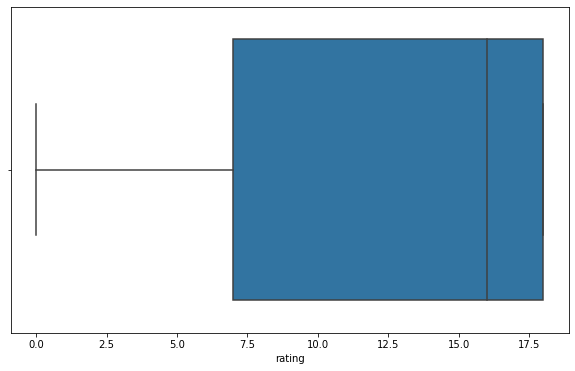

In [78]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(netflix["rating"])

In [41]:
netflix["runtimeMinutes"].describe()

count    1344.000000
mean       51.755208
std        61.073436
min         2.000000
25%        26.000000
50%        43.000000
75%        60.000000
max       990.000000
Name: runtimeMinutes, dtype: float64

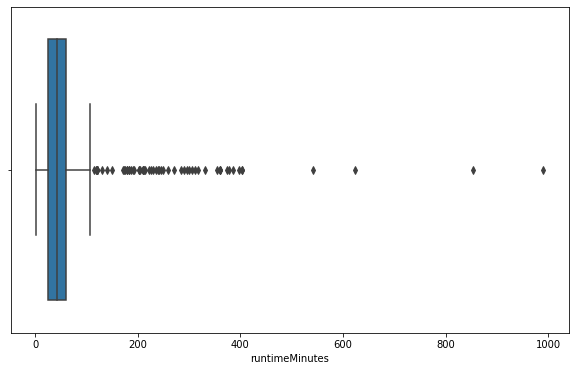

In [53]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(netflix["runtimeMinutes"])

(0, 100)

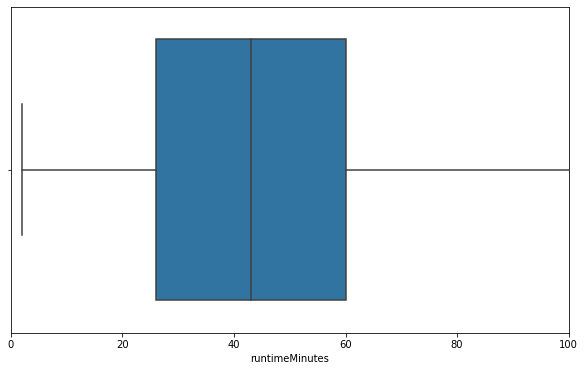

In [54]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(netflix["runtimeMinutes"])
ax.set_xlim(0, 100)

In [56]:
netflix["startYear"].describe()

count    1784.000000
mean     2014.068386
std         6.808809
min      1959.000000
25%      2013.000000
50%      2016.000000
75%      2018.000000
max      2020.000000
Name: startYear, dtype: float64

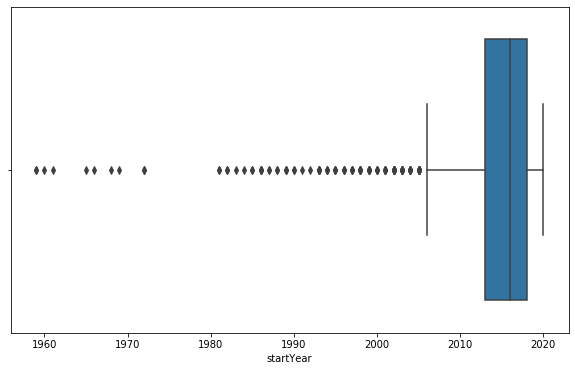

In [57]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(netflix["startYear"])

(2000, 2020)

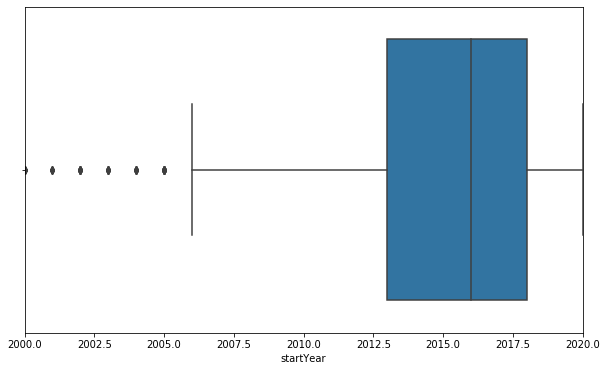

In [58]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(netflix["startYear"])
ax.set_xlim(2000, 2020)

In [62]:
ratings = pd.read_csv("C:/Users/Admin/Documents/ironhack/title.ratings.tsv.gz", sep="\t")

In [63]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1613
1,tt0000002,6.0,197
2,tt0000003,6.5,1294
3,tt0000004,6.1,121
4,tt0000005,6.1,2066


In [64]:
netflix = netflix.merge(ratings, how="left", on="tconst")

In [65]:
netflix.head()

,show,year,rating,imdb,rotten_tomatoes,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Crime,Drama,Thriller,Fantasy,Horror,Mystery,Comedy,Sci-Fi,Biography,Action,Adventure,Romance,History,Documentary,Animation,War,Sport,Family,Western,Short,Reality-TV,Musical,Music,Game-Show,Talk-Show,News,averageRating,numVotes
0,Breaking Bad,2008,18.0,9.5,96%,tt0903747,tvSeries,Breaking Bad,Breaking Bad,0.0,2008.0,2008.0,49.0,"Crime,Drama,Thriller",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.5,1348438.0
1,Stranger Things,2016,16.0,8.8,93%,tt4574334,tvSeries,Stranger Things,Stranger Things,0.0,2016.0,2016.0,51.0,"Drama,Fantasy,Horror",0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.8,736180.0
2,Sherlock,2010,16.0,9.1,78%,tt1475582,tvSeries,Sherlock,Sherlock,0.0,2010.0,2010.0,88.0,"Crime,Drama,Mystery",1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.1,760651.0
3,Better Call Saul,2015,18.0,8.7,97%,tt3032476,tvSeries,Better Call Saul,Better Call Saul,0.0,2015.0,2015.0,46.0,"Crime,Drama",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7,289944.0
4,The Office,2005,16.0,8.9,81%,tt0386676,tvSeries,The Office,The Office,0.0,2005.0,2005.0,22.0,Comedy,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.9,355598.0


In [66]:
netflix = netflix.drop(columns="numVotes")

In [67]:
netflix.head()

,show,year,rating,imdb,rotten_tomatoes,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Crime,Drama,Thriller,Fantasy,Horror,Mystery,Comedy,Sci-Fi,Biography,Action,Adventure,Romance,History,Documentary,Animation,War,Sport,Family,Western,Short,Reality-TV,Musical,Music,Game-Show,Talk-Show,News,averageRating
0,Breaking Bad,2008,18.0,9.5,96%,tt0903747,tvSeries,Breaking Bad,Breaking Bad,0.0,2008.0,2008.0,49.0,"Crime,Drama,Thriller",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.5
1,Stranger Things,2016,16.0,8.8,93%,tt4574334,tvSeries,Stranger Things,Stranger Things,0.0,2016.0,2016.0,51.0,"Drama,Fantasy,Horror",0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.8
2,Sherlock,2010,16.0,9.1,78%,tt1475582,tvSeries,Sherlock,Sherlock,0.0,2010.0,2010.0,88.0,"Crime,Drama,Mystery",1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.1
3,Better Call Saul,2015,18.0,8.7,97%,tt3032476,tvSeries,Better Call Saul,Better Call Saul,0.0,2015.0,2015.0,46.0,"Crime,Drama",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
4,The Office,2005,16.0,8.9,81%,tt0386676,tvSeries,The Office,The Office,0.0,2005.0,2005.0,22.0,Comedy,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.9


In [68]:
netflix["averageRating"].describe()

count    1768.000000
mean        7.163575
std         1.076180
min         1.800000
25%         6.600000
50%         7.400000
75%         7.900000
max         9.500000
Name: averageRating, dtype: float64

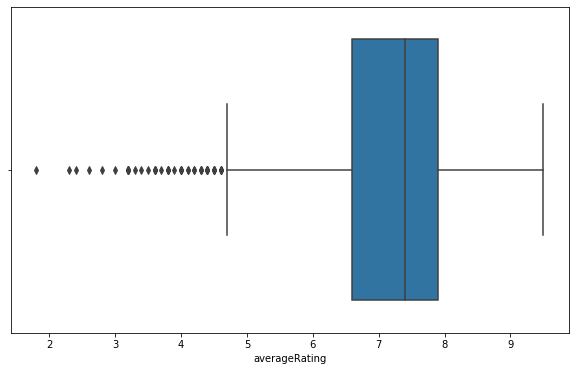

In [69]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(netflix["averageRating"])

In [70]:
netflix["imdb"].describe()

count    1741.000000
mean        7.182424
std         1.080449
min         1.000000
25%         6.600000
50%         7.400000
75%         8.000000
max         9.500000
Name: imdb, dtype: float64

In [77]:
netflix[netflix["averageRating"] < 5].sort_values("averageRating").head(20)

,show,year,rating,imdb,rotten_tomatoes,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Crime,Drama,Thriller,Fantasy,Horror,Mystery,Comedy,Sci-Fi,Biography,Action,Adventure,Romance,History,Documentary,Animation,War,Sport,Family,Western,Short,Reality-TV,Musical,Music,Game-Show,Talk-Show,News,averageRating
1218,Game Winning Hit,2009,NaN,1.8,NaN,tt6026194,tvSeries,Game Winning Hit,Game Winning Hit,0.0,2009.0,2009.0,45.0,"Drama,Sport",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.8
1003,The Goop Lab,2020,18.0,2.3,31%,tt11561206,tvSeries,The Goop Lab,The Goop Lab,0.0,2020.0,2020.0,30.0,"Documentary,Reality-TV",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2.3
1562,Entangled,2014,NaN,6.5,NaN,tt10322826,tvSeries,Entangled,Entangled,0.0,2019.0,2019.0,NaN,Sci-Fi,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.4
1150,Bromance,2008,NaN,2.6,NaN,tt1244881,tvSeries,Bromance,Bromance,0.0,2008.0,2008.0,60.0,Reality-TV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.6
1236,ViR: The Robot Boy,2013,NaN,2.8,NaN,tt8242412,tvSeries,ViR: The Robot Boy,ViR: The Robot Boy,0.0,2013.0,2013.0,NaN,"Animation,Comedy,Family",0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2.8
1240,For the Win,2017,NaN,3.0,NaN,tt5740316,tvSeries,For the Win,For the Win,0.0,2017.0,2017.0,NaN,Sport,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3.0
997,Don't Watch This,2018,16.0,3.2,NaN,tt9201996,tvMiniSeries,Don't Watch This,Don't Watch This,0.0,2018.0,2018.0,NaN,"Horror,Short",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3.2
1560,Great World Hotels,2012,NaN,3.2,NaN,tt3831598,tvMiniSeries,Great World Hotels,Great World Hotels,0.0,2011.0,2011.0,NaN,Documentary,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.2
1210,The Day My Butt Went Psycho!,2013,NaN,3.2,NaN,tt4363582,tvSeries,The Day My Butt Went Psycho!,The Day My Butt Went Psycho!,0.0,2013.0,2013.0,NaN,"Action,Adventure,Animation",0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.2
711,The Bachelor,2002,16.0,3.2,NaN,tt0313038,tvSeries,The Bachelor,The Bachelor,0.0,2002.0,2002.0,60.0,"Drama,Game-Show,Reality-TV",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,3.2


In [79]:
(netflix[netflix["averageRating"] < 5]).shape[0] / netflix.shape[0]

0.03723986856516977